#RNN#

In [ ]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pandas.read_csv("dataset.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:1000].astype(float)
Y = dataset[:,1000]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# create model
model = Sequential()
model.add(Dense(8, input_dim=1000, activation='relu'))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nepochs = 200
nbatch = 5

model.fit(X, dummy_y, epochs=nepochs, batch_size=nbatch)
_, accuracy = model.evaluate(X, dummy_y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/200
15/15 [==============================] - 1s 2ms/step - loss: 2.5295 - accuracy: 0.2500
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 1.6781 - accuracy: 0.3333
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 1.3349 - accuracy: 0.4444
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0934 - accuracy: 0.5833
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9295 - accuracy: 0.6528
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7604 - accuracy: 0.7361
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.8194
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.9028
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.9167
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.9306
Epoch 11/

#Naive Bayes#

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 2 1 0 3]
 [0 0 0 1 0 0]
 [1 0 0 0 2 0]
 [0 1 0 0 0 1]]
Accuracy Score:  0.5333333333333333
              precision    recall  f1-score   support

     Caramel       0.50      1.00      0.67         1
     cokelat       0.33      1.00      0.50         1
        kopi       1.00      0.29      0.44         7
      pisang       0.50      1.00      0.67         1
    stroberi       1.00      0.67      0.80         3
        taro       0.25      0.50      0.33         2

    accuracy                           0.53        15
   macro avg       0.60      0.74      0.57        15
weighted avg       0.79      0.53      0.53        15



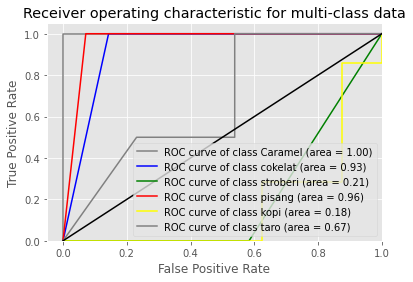

In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# dataframe = pandas.read_csv("datasetbaru.csv", header=None)
dataframe = pandas.read_csv("dataset.csv")
dataset = dataframe.values
X = dataset[:,0:1000].astype(float) # X diambil dari seluruh baris, kolom 2 s.d kolom 1500-1
y = dataset[:,1000] # Y diambil dari seluruh baris, kolom 1

# membagi dataset menjadi data training dan data testing
# data training sebesar 80%, data testing sebesar 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
, random_state=0)

#-----------
# create model 

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
clf = model.fit(X_train, y_train)
#------------

y_pred = model.predict(X_test)
# Use score method to get accuracy of the model
#score_te = model.score(X_test, y_test)
#print('Accuracy Score: ', score_te)

cm = confusion_matrix(y_test, y_pred)
print (cm)

# Use accuracy_score to get accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)

print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
y_score = model.predict_proba(X_test)
from sklearn.preprocessing import label_binarize

classes = ['Caramel', 'cokelat', 'stroberi', 'pisang', 'kopi','taro']
# Binarize the output
y_test = label_binarize(y_test, classes=classes)
n_classes = y_test.shape[1]
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['gray', 'blue', 'green', 'red', 'yellow'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

#SVM#

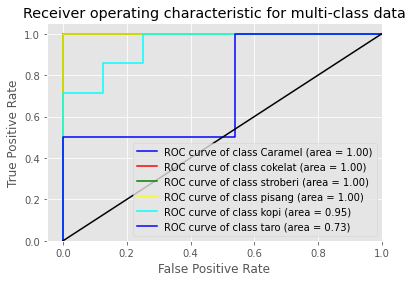

Accuracy Score:  0.13333333333333333
              precision    recall  f1-score   support

     Caramel       0.00      0.00      0.00         1
     cokelat       0.20      1.00      0.33         1
        kopi       0.00      0.00      0.00         7
      pisang       0.10      1.00      0.18         1
    stroberi       0.00      0.00      0.00         3
        taro       0.00      0.00      0.00         2

    accuracy                           0.13        15
   macro avg       0.05      0.33      0.09        15
weighted avg       0.02      0.13      0.03        15



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import pandas
plt.style.use('ggplot')

# dataframe = pandas.read_csv("datasetall.csv", header=None)
dataframe = pandas.read_csv("dataset.csv")
dataset = dataframe.values
X = dataset[:,0:1000:].astype(float) # X diambil dari seluruh baris, kolom 2 s.d kolom 1500-1
y = dataset[:,1000] # Y diambil dari seluruh baris, kolom 1
classes = ['Caramel', 'cokelat', 'stroberi', 'pisang', 'kopi','taro']
# Binarize the output
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]
# We split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size
= 0.2, random_state=0)
#We define the model as an SVC in OneVsRestClassifier setting.
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True
))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
# We split the data into training and test sets for training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
# the model
classifier_svc = svm.SVC(kernel='rbf',random_state=0)
# fit the model using the training set
classifier_svc.fit(X_train, y_train)
# predict the labels/classes of the test set
y_pred = classifier_svc.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

# Use accuracy_score to get accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)
print(classification_report(y_test, y_pred))

#Decision Tree#

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, classification_report


# load dataset
df= pd.read_csv("dataset.csv", header=None)
dataset = df.values

# feature_cols = ['Bel', 'Emoney', 'Memorry Card', 'Mouse', 'Powerbank','Voice Recorder']
X = dataset[:,0:1000:].astype(float) # X diambil dari seluruh baris, kolom 2 s.d kolom 1500-1
y = dataset[:,1000] # Y diambil dari seluruh baris, kolom 1
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.45454545454545453
              precision    recall  f1-score   support

     Caramel       0.20      0.50      0.29         2
     cokelat       0.50      0.50      0.50         2
        kopi       0.60      0.60      0.60         5
      pisang       0.75      1.00      0.86         3
    stroberi       0.33      0.14      0.20         7
        taro       0.33      0.33      0.33         3

    accuracy                           0.45        22
   macro avg       0.45      0.51      0.46        22
weighted avg       0.45      0.45      0.43        22

